# Feature Engineering_4

## 5. Feature Selection

So far, we have gone over how to increase number of feature. But if we increase number of feature too much, then model will get 

complicated and vulnerable to overfitting. Besides, in usual problem, we often face problem that has many features. 

Then, how can we decrease number of feature? Basically, there are three methods.

**Univariate statistics, model-based selection and iterative selection.** By decreasing number of feature, model could be more simple,

generalized. These methods are for supervised learning which has target value.

### 5.1 Univariate Statistics

Univariate Statistics explore relation between feature and target. It calculates p-value by ANOVA test assuming that all features are 

independent and selects features that has influence to target.(**F-test**) Easy to apply and adjusting threshold is available.


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

#### f_classif

In [2]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


Number of features in dataset decrease by 50%.

By using **get_support** method, we can check which features are selected.

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5,0,'Feature number')

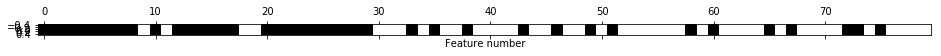

In [3]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature number")

As graph describe, selected features are almost original feature, not noise.

In practice problem, you can apply this method when you think there are many features which has any influence or just there are many features.

### 5.2 Model-Based Selection

Model-based selection literally use machine learning model to select feature measuring importance of features. Typically, 

**feature_importances_** in decision tree model is one of them. And, **L1 regularization** in linear model is also model-based selection.

It can be regared as preprocessing method before applying final machine learning algorithm you want to use. 

These method consider interaction.

In [4]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

**SelectFromModel** selects features which has higher importances than threshold. It is more porwerful than univariate statistics.

In [5]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5,0,'Feature Number')

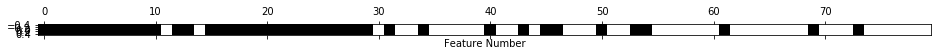

In [6]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Number")

It filters noise better than univariate statistics.

### 5.3 Iterative Feature Selection

Univariate statistics doesn't use model, Model-based selection use a model and Iterative feature selection use sever model to select.

There are two ways in **iterative feature selection**. Start with scratch and add a feature until it satisfies specific condition. 

Or, Start with all features and delete a feature until it satisfies specific condition. It considers many models, so its calculation cost

is more than others. It is called **RFE (recursive features elimination)**. It needs a model to select like model-based selection.

Text(0.5,0,'Feature Number')

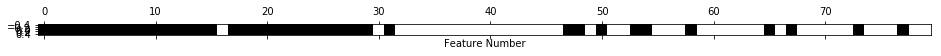

In [7]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Number")

#####  Draw features

In [8]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)